# Algoritmos de Optimización - Actividad Guiada 1

Nombre: ***Josseph Yaakob Catagua Cobos*** <br>

https://github.com/HikariJY/03MIAR_04_A_2024-25_Algoritmos-de-Optimizacion

## Actividad Propuesta

Dado un conjunto de puntos se trata de encontrar los dos puntos más cercanos. <br>

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def lista_random(dimension:int=1, tamano:int=10, min:float=0.0, max:float=255.0, decimales:int=0) -> np.ndarray:
    if 0 < dimension < 4 and tamano > 0 and min < max:
        res = np.random.uniform(low=min, high=max, size=(tamano, dimension))
        res = np.round(res, decimals=decimales)
        return res[:, 0] if dimension == 1 else res
    raise ValueError('Error al ingresar los datos ... 0 < dimension < 4 ... tamano > 0 ... min < max ...')

### Lista 1D

In [2]:
lista1D = lista_random(dimension=1, tamano=5, min=0, max=10)
print(f'Lista 1D: {lista1D}')

Lista 1D: [3. 9. 1. 2. 6.]


#### Primer intento: Fuerza bruta

In [3]:
def fuerza_bruta_1d(lista:np.ndarray):
    if np.ndim(lista) != 1:
        raise ValueError("Error solo se admiten listas de 1D ...")
    if lista.size < 2:
        print('Error, lista debe tener al menos dos valores para calcular.')
    else:
        minimo = 0, 0, float('inf')
        for i in range(lista.size):
            for j in range(i + 1, lista.size):
                distancia = np.abs(lista[i] - lista[j])
                if distancia < minimo[2]: minimo = i + 1, j + 1, distancia
        res = minimo
        print(f'La distancia minima es entre el punto {res[0]} con valor {lista[res[0]-1]} y {res[1]} con valor {lista[res[1]-1]}. Con una distancia de {res[2]} unidades.')

fuerza_bruta_1d(lista=lista1D)

La distancia minima es entre el punto 1 con valor 3.0 y 4 con valor 2.0. Con una distancia de 1.0 unidades.


Se puede observar en la primera iteración operaciones de $i*j$ equivalente a $n*(n-1)$ siendo $n$ la cantidad de valores de la lista de 1D. <br>
<center> $Orden = \sum_{i=0}^n n*(n-1)$ </center>
Tiene una complejidad de $O(n^2)$ y puede ser mejorable. <br>


#### Segundo intento: Divide y vencerás

In [4]:
def _divide_venceras_1d(lista:np.ndarray, v_min:int, v_max:int) -> tuple:
    if lista.size < 3:
        minimo = v_min, v_max, np.abs(lista[0] - lista[1])
    else:
        medio = lista.size // 2
        min_izq = _divide_venceras_1d(lista=lista[:medio + 1], v_min=v_min, v_max=v_min + medio)
        min_der = _divide_venceras_1d(lista=lista[medio:], v_min=v_min + medio, v_max=v_max)
        minimo = min([min_izq, min_der], key=lambda p: p[2])
    return minimo

def divide_venceras_1d(lista:np.ndarray):
    if np.ndim(lista) != 1:
        raise ValueError("Error solo se admiten listas de 1D ...")
    if lista.size < 2:
        print('Error, lista debe tener al menos dos valores para calcular.')
    else:
        lista_ordenada = np.sort(lista)
        minimo = _divide_venceras_1d(lista=lista_ordenada, v_min=1, v_max=lista.size)
        indice_1 = np.where(lista == lista_ordenada[minimo[0] - 1])[0][0] + 1
        indice_2 = np.where(lista == lista_ordenada[minimo[1] - 1])[0][0] + 1
        res = min(indice_1, indice_2), max(indice_1,indice_2), minimo[2]
        print(f'La distancia minima es entre el punto {res[0]} con valor {lista[res[0]-1]} y {res[1]} con valor {lista[res[1]-1]}. Con una distancia de {res[2]} unidades.')

divide_venceras_1d(lista=lista1D)

La distancia minima es entre el punto 3 con valor 1.0 y 4 con valor 2.0. Con una distancia de 1.0 unidades.


El proceso de ordenamiento de la lista tiene un Orden de $n\log{(n)}$ y que la función que se encarga de encontrar la distancia mínima tiene un Orden de $\log{(n)}$. <br>
<center> $Orden = n\log{(n)} + \log{(n)}$ </center>
Tiene una complejidad de $O(n\log{(n)})$, no se sabe si puede ser mejorable con otro metodo. <br>

### Lista 2D

[[7. 7.]
 [9. 3.]
 [6. 7.]
 [3. 1.]
 [6. 1.]]


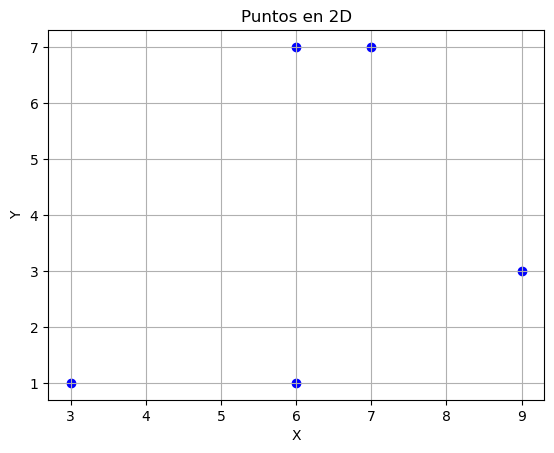

In [5]:
lista2D = lista_random(dimension=2, tamano=5, min=0, max=10)
print(lista2D)

x, y = zip(*lista2D)
plt.scatter(x, y, label='Puntos', color='blue')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Puntos en 2D')
plt.grid(True)
plt.show()

#### Primer intento: Fuerza bruta

In [6]:
def fuerza_bruta_2d(lista:np.ndarray):
    if len(lista[0]) != 2:
        raise ValueError("Error solo se admiten listas de 2D ...")
    if lista.shape[0] < 2:
        print('Error, lista debe tener al menos dos valores para calcular.')
    else:
        minimo = 0, 0, float('inf')
        for i in range(lista.shape[0]):
            for j in range(i + 1, lista.shape[0]):
                distancia = np.round(np.linalg.norm(lista[i] - lista[j]), 4)
                if distancia < minimo[2]: minimo = i + 1, j + 1, distancia
        res = minimo
        print(f'La distancia minima es entre el punto {res[0]} con valor {lista[res[0]-1]} y {res[1]} con valor {lista[res[1]-1]}. Con una distancia de {res[2]} unidades.')

fuerza_bruta_2d(lista=lista2D)

La distancia minima es entre el punto 1 con valor [7. 7.] y 3 con valor [6. 7.]. Con una distancia de 1.0 unidades.


Se puede observar en la primera iteración operaciones de $i*j$ equivalente a $n*(n-1)$ siendo $n$ la cantidad de valores de la lista de 2D. <br>
<center> $Orden = 2\sum_{i=0}^n n*(n-1)$ </center>
Tiene una complejidad de $O(n^2)$ y puede ser mejorable. <br>

#### Segundo intento: Divide y vencerás

In [7]:
def _divide_venceras_2d(lista:np.ndarray, v_min:int, v_max:int) -> tuple:
    if lista.shape[0] < 3:
        minimo = v_min, v_max, np.round(np.linalg.norm(lista[0] - lista[1]), 4)
    else:
        medio = lista.shape[0] // 2
        min_izq = _divide_venceras_2d(lista=lista[:medio + 1], v_min=v_min, v_max=v_min + medio)
        min_der = _divide_venceras_2d(lista=lista[medio:], v_min=v_min + medio, v_max=v_max)
        minimo = min([min_izq, min_der], key=lambda p: p[2])
    return minimo

def divide_venceras_2d(lista:np.ndarray):
    if len(lista[0]) != 2:
        raise ValueError("Error solo se admiten listas de 2D ...")
    if lista.shape[0] < 2:
        print('Error, lista debe tener al menos dos valores para calcular.')
    else:
        lista_ordenada_x = np.array(sorted(lista, key=lambda p: p[0]))
        lista_ordenada_y = np.array(sorted(lista, key=lambda p: p[1]))
        minimo_x = _divide_venceras_2d(lista=lista_ordenada_x, v_min=1, v_max=lista.shape[0])
        minimo_y = _divide_venceras_2d(lista=lista_ordenada_y, v_min=1, v_max=lista.shape[0])
        minimo = min([minimo_x, minimo_y], key=lambda p: p[2])
        if minimo == minimo_x:
            lista_ordenada = lista_ordenada_x
        elif minimo == minimo_y:
            lista_ordenada = lista_ordenada_y
        indice_1 = np.where((lista == lista_ordenada[minimo[0] - 1]).all(axis=1))[0][0] + 1
        indice_2 = np.where((lista == lista_ordenada[minimo[1] - 1]).all(axis=1))[0][0] + 1
        res = min(indice_1, indice_2), max(indice_1,indice_2), minimo[2]
        print(f'La distancia minima es entre el punto {res[0]} con valor {lista[res[0]-1]} y {res[1]} con valor {lista[res[1]-1]}. Con una distancia de {res[2]} unidades.')

divide_venceras_2d(lista=lista2D)

La distancia minima es entre el punto 1 con valor [7. 7.] y 3 con valor [6. 7.]. Con una distancia de 1.0 unidades.


El proceso de ordenamiento de la lista tiene un Orden de $n\log{(n)}$ y que la función que se encarga de encontrar la distancia mínima tiene un Orden de $\log{(n)}$. <br>
<center> $Orden = 2 n\log{(n)} + 2\log{(n)}$ </center>
Tiene una complejidad de $O(n\log{(n)})$, no se sabe si puede ser mejorable con otro metodo. <br>

### Lista 3D

[[ 5.  5.  9.]
 [ 5.  6.  1.]
 [10.  3.  4.]
 [ 4.  1.  3.]
 [ 1.  3.  1.]]


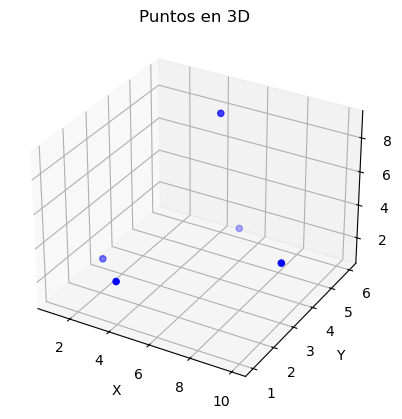

In [8]:
lista3D = lista_random(dimension=3, tamano=5, min=0, max=10)
print(lista3D)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x, y, z = zip(*lista3D)
ax.scatter(x, y, z, c='b', marker='o')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.title('Puntos en 3D')
plt.show()

#### Primer intento: Fuerza bruta

In [9]:
def fuerza_bruta_3d(lista:np.ndarray):
    if len(lista[0]) != 3:
        raise ValueError("Error solo se admiten listas de 3D ...")
    if lista.shape[0] < 2:
        print('Error, lista debe tener al menos dos valores para calcular.')
    else:
        minimo = 0, 0, float('inf')
        for i in range(lista.shape[0]):
            for j in range(i + 1, lista.shape[0]):
                distancia = np.round(np.linalg.norm(lista[i] - lista[j]), 4)
                if distancia < minimo[2]: minimo = i + 1, j + 1, distancia
        res = minimo
        print(f'La distancia minima es entre el punto {res[0]} con valor {lista[res[0]-1]} y {res[1]} con valor {lista[res[1]-1]}. Con una distancia de {res[2]} unidades.')

fuerza_bruta_3d(lista=lista3D)

La distancia minima es entre el punto 4 con valor [4. 1. 3.] y 5 con valor [1. 3. 1.]. Con una distancia de 4.1231 unidades.


Se puede observar en la primera iteración operaciones de $i*j$ equivalente a $n*(n-1)$ siendo $n$ la cantidad de valores de la lista de 3D. <br>
<center> $Orden = 3\sum_{i=0}^n n*(n-1)$ </center>
Tiene una complejidad de $O(n^2)$ y puede ser mejorable. <br>

#### Segundo intento: Divide y vencerás

In [10]:
def _divide_venceras_3d(lista:np.ndarray, v_min:int, v_max:int) -> tuple:
    if lista.shape[0] < 3:
        minimo = v_min, v_max, np.round(np.linalg.norm(lista[0] - lista[1]), 4)
    else:
        medio = lista.shape[0] // 2
        min_izq = _divide_venceras_2d(lista=lista[:medio + 1], v_min=v_min, v_max=v_min + medio)
        min_der = _divide_venceras_2d(lista=lista[medio:], v_min=v_min + medio, v_max=v_max)
        minimo = min([min_izq, min_der], key=lambda p: p[2])
    return minimo

def divide_venceras_3d(lista:np.ndarray):
    if len(lista[0]) != 3:
        raise ValueError("Error solo se admiten listas de 3D ...")
    if lista.shape[0] < 2:
        print('Error, lista debe tener al menos dos valores para calcular.')
    else:
        lista_ordenada_x = np.array(sorted(lista, key=lambda p: p[0]))
        lista_ordenada_y = np.array(sorted(lista, key=lambda p: p[1]))
        lista_ordenada_z = np.array(sorted(lista, key=lambda p: p[2]))
        minimo_x = _divide_venceras_2d(lista=lista_ordenada_x, v_min=1, v_max=lista.shape[0])
        minimo_y = _divide_venceras_2d(lista=lista_ordenada_y, v_min=1, v_max=lista.shape[0])
        minimo_z = _divide_venceras_2d(lista=lista_ordenada_z, v_min=1, v_max=lista.shape[0])
        minimo = min([minimo_x, minimo_y, minimo_z], key=lambda p: p[2])
        if minimo == minimo_x:
            lista_ordenada = lista_ordenada_x
        elif minimo == minimo_y:
            lista_ordenada = lista_ordenada_y
        elif minimo == minimo_z:
            lista_ordenada = lista_ordenada_z
        indice_1 = np.where((lista == lista_ordenada[minimo[0] - 1]).all(axis=1))[0][0] + 1
        indice_2 = np.where((lista == lista_ordenada[minimo[1] - 1]).all(axis=1))[0][0] + 1
        res = min(indice_1, indice_2), max(indice_1,indice_2), minimo[2]
        print(f'La distancia minima es entre el punto {res[0]} con valor {lista[res[0]-1]} y {res[1]} con valor {lista[res[1]-1]}. Con una distancia de {res[2]} unidades.')

divide_venceras_3d(lista=lista3D)

La distancia minima es entre el punto 4 con valor [4. 1. 3.] y 5 con valor [1. 3. 1.]. Con una distancia de 4.1231 unidades.


El proceso de ordenamiento de la lista tiene un Orden de $n\log{(n)}$ y que la función que se encarga de encontrar la distancia mínima tiene un Orden de $\log{(n)}$. <br>
<center> $Orden = 2 n\log{(n)} + 2\log{(n)}$ </center>
Tiene una complejidad de $O(n\log{(n)})$, no se sabe si puede ser mejorable con otro metodo. <br>

## Actividades en Clases

### Torres de Hanoi (Divide y vencerás)

#### Enseñado

In [11]:
def Torres_Hanoi(N, desde, hasta):
  if N == 1 :
    print("Lleva la ficha ", desde, " hasta ", hasta)
  else:
    #Torres_Hanoi(N-1, desde, 6-desde-hasta)
    Torres_Hanoi(N-1, desde, 6-desde-hasta)
    print("Lleva la ficha ", desde, " hasta ", hasta)
    #Torres_Hanoi(N-1, 6-desde-hasta, hasta)
    Torres_Hanoi(N-1, 6-desde-hasta, hasta)

Torres_Hanoi(3, 1, 3)

Lleva la ficha  1  hasta  3
Lleva la ficha  1  hasta  2
Lleva la ficha  3  hasta  2
Lleva la ficha  1  hasta  3
Lleva la ficha  2  hasta  1
Lleva la ficha  2  hasta  3
Lleva la ficha  1  hasta  3


#### Mio

In [12]:
def torres_de_hanoi(n:int=3, origen:int=1, destino:int=3):
    auxiliar = 6 - origen - destino
    if n == 1:
        print(f'Mover disco {n} desde {origen} hasta {destino}.')
    else:
        torres_de_hanoi(n=n - 1, origen=origen, destino=auxiliar)
        print(f'Mover disco {n} desde {origen} hasta {destino}.')
        torres_de_hanoi(n=n - 1, origen=auxiliar, destino=destino)

numero_de_discos = 3
torres_de_hanoi(n=numero_de_discos, origen=1, destino=3)

Mover disco 1 desde 1 hasta 3.
Mover disco 2 desde 1 hasta 2.
Mover disco 1 desde 3 hasta 2.
Mover disco 3 desde 1 hasta 3.
Mover disco 1 desde 2 hasta 1.
Mover disco 2 desde 2 hasta 3.
Mover disco 1 desde 1 hasta 3.


#### Extra, con ayuda

In [13]:
def imprimir_estado_torres(estado_torres:dict):
    for torre, discos in estado_torres.items():
        print(f'Torre {torre}: {discos}')

def torres_de_hanoi_con_estado(estado_torres:dict, n:int=3, origen:int=1, destino:int=3):
    auxiliar = 6 - origen - destino
    if n == 1:
        disco = estado_torres[origen].pop()
        print(f'Lleva la ficha {disco} desde {origen} hasta {destino}.')
        estado_torres[destino].append(disco)
        imprimir_estado_torres(estado_torres=estado_torres)
    else:
        torres_de_hanoi_con_estado(estado_torres=estado_torres, n=n-1, origen=origen, destino=auxiliar)
        disco = estado_torres[origen].pop()
        print(f'Lleva la ficha {disco} desde {origen} hasta {destino}.')
        estado_torres[destino].append(disco)
        imprimir_estado_torres(estado_torres=estado_torres)
        torres_de_hanoi_con_estado(estado_torres=estado_torres, n=n-1, origen=auxiliar, destino=destino)

numero_de_discos = 3
estado_inicial = {
    1: list(range(numero_de_discos, 0, -1)),
    2: [],
    3: []
}
print("Estado Inicial:")
imprimir_estado_torres(estado_torres=estado_inicial)
print("Pasos:")
torres_de_hanoi_con_estado(estado_torres=estado_inicial, n=numero_de_discos, origen=1, destino=3)

Estado Inicial:
Torre 1: [3, 2, 1]
Torre 2: []
Torre 3: []
Pasos:
Lleva la ficha 1 desde 1 hasta 3.
Torre 1: [3, 2]
Torre 2: []
Torre 3: [1]
Lleva la ficha 2 desde 1 hasta 2.
Torre 1: [3]
Torre 2: [2]
Torre 3: [1]
Lleva la ficha 1 desde 3 hasta 2.
Torre 1: [3]
Torre 2: [2, 1]
Torre 3: []
Lleva la ficha 3 desde 1 hasta 3.
Torre 1: []
Torre 2: [2, 1]
Torre 3: [3]
Lleva la ficha 1 desde 2 hasta 1.
Torre 1: [1]
Torre 2: [2]
Torre 3: [3]
Lleva la ficha 2 desde 2 hasta 3.
Torre 1: [1]
Torre 2: []
Torre 3: [3, 2]
Lleva la ficha 1 desde 1 hasta 3.
Torre 1: []
Torre 2: []
Torre 3: [3, 2, 1]


### Sucesión de Fibonacci (Divide y vencerás)

#### Enseñado

In [14]:
#Sucesión_de_Fibonacci
#https://es.wikipedia.org/wiki/Sucesi%C3%B3n_de_Fibonacci
#Calculo del termino n-simo de la suscesión de Fibonacci
def Fibonacci(N:int):
  if N < 2:
    return 1
  else:
    return Fibonacci(N-1)+Fibonacci(N-2)

Fibonacci(8)

34

#### Mio

In [15]:
def fibonacci(n:int) -> int:
    if n < 2:
        return n
    else:
        return fibonacci(n=n - 1) + fibonacci(n=n - 2)

indice = 8
valor_fibonacci = fibonacci(n=indice)
print(f"El valor {indice}-ésimo de la serie de Fibonacci es: {valor_fibonacci}")

El valor 8-ésimo de la serie de Fibonacci es: 21


### Devolución de cambio (Técnica voraz)

### Enseñado

In [16]:
def cambio_monedas(N, SM):
  SOLUCION = [0]*len(SM)   #SOLUCION = [0,0,0,0,..]
  ValorAcumulado = 0
  for i,valor in enumerate(SM):
    monedas =  (N-ValorAcumulado)//valor
    SOLUCION[i] = monedas
    ValorAcumulado = ValorAcumulado + monedas*valor
    if ValorAcumulado == N:
      return SOLUCION

cambio_monedas(314,[25,10,5,1])

[12, 1, 0, 4]

### Mio

In [17]:
def cambio_monedas(cantidada:int, sistema_monetario:list):
    res = [0] * len(sistema_monetario)
    for i, valor in enumerate(sistema_monetario):
        monedas = cantidada // valor
        cantidada -= monedas * valor
        res[i] = monedas
    res = list(zip(sistema_monetario, res))
    for valor, cantidad in res:
        print(f"{cantidad} moneda(s) de {valor} unidades")

cambio_monedas(cantidada=314, sistema_monetario=[25, 10, 5, 1])

12 moneda(s) de 25 unidades
1 moneda(s) de 10 unidades
0 moneda(s) de 5 unidades
4 moneda(s) de 1 unidades


### N-Reinas (Vuelta atrás)

#### Enseñado

In [18]:
def escribe(S):
  n = len(S)
  for x in range(n):
    print("")
    for i in range(n):
      if S[i] == x+1:
        print(" X " , end="")
      else:
        print(" - ", end="")

def es_prometedora(SOLUCION,etapa):
  #print(SOLUCION)
  #Si la solución tiene dos valores iguales no es valida => Dos reinas en la misma fila
  for i in range(etapa+1):
    #print("El valor " + str(SOLUCION[i]) + " está " +  str(SOLUCION.count(SOLUCION[i])) + " veces")
    if SOLUCION.count(SOLUCION[i]) > 1:
      return False
    #Verifica las diagonales
    for j in range(i+1, etapa +1 ):
      #print("Comprobando diagonal de " + str(i) + " y " + str(j))
      if abs(i-j) == abs(SOLUCION[i]-SOLUCION[j]) : return False
  return True

def reinas(N, solucion=[], etapa=0):
  if len(solucion) == 0:
      solucion=[0 for i in range(N)]
  for i in range(1, N+1):
    solucion[etapa] = i
    if es_prometedora(solucion, etapa):
      if etapa == N-1:
        print(solucion)
        escribe(solucion)
        print()
      else:
        reinas(N, solucion, etapa+1)
    else:
      None
    solucion[etapa] = 0

reinas(4)

[2, 4, 1, 3]

 -  -  X  - 
 X  -  -  - 
 -  -  -  X 
 -  X  -  - 
[3, 1, 4, 2]

 -  X  -  - 
 -  -  -  X 
 X  -  -  - 
 -  -  X  - 


#### Mio

In [19]:
def dibujar_soluciones(soluciones:list=[]):
    for i, solucion in enumerate(soluciones):
        print(f"Solución {i + 1}:")
        for fila in solucion:
            print(fila)
        print()

def es_seguro(tablero:list, fila:int, columna:int) -> bool:
    # Verificar si hay una reina en la misma fila
    for i in range(columna):
        if tablero[fila][i] == 1:
            return False
    # Verificar diagonal superior en el lado izquierdo
    for i, j in zip(range(fila, -1, -1), range(columna, -1, -1)):
        if tablero[i][j] == 1:
            return False
    # Verificar diagonal inferior en el lado izquierdo
    for i, j in zip(range(fila, len(tablero)), range(columna, -1, -1)):
        if tablero[i][j] == 1:
            return False
    return True

def resolver_n_reinas_util(tablero:list, col:int, soluciones:list):
    if col >= len(tablero):
        # Encontró una solución, añadir a la lista de soluciones
        soluciones.append([fila[:] for fila in tablero])
    for i in range(len(tablero)):
        if es_seguro(tablero=tablero, fila=i, columna=col):
            tablero[i][col] = 1
            resolver_n_reinas_util(tablero=tablero, col=col + 1, soluciones=soluciones)
            tablero[i][col] = 0

def resolver_n_reinas(n:int=8):
    print(f'Para un tablero de {n}x{n} y {n} reinas.\n')
    tablero = [[0] * n for _ in range(n)]
    soluciones = []
    resolver_n_reinas_util(tablero, 0, soluciones)
    dibujar_soluciones(soluciones)

soluciones = resolver_n_reinas(4)

Para un tablero de 4x4 y 4 reinas.

Solución 1:
[0, 0, 1, 0]
[1, 0, 0, 0]
[0, 0, 0, 1]
[0, 1, 0, 0]

Solución 2:
[0, 1, 0, 0]
[0, 0, 0, 1]
[1, 0, 0, 0]
[0, 0, 1, 0]



### Viaje por el río (Programación dinámica)

#### Enseñando

In [20]:
TARIFAS = [
[0,5,4,3,999,999,999],
[999,0,999,2,3,999,11],
[999,999, 0,1,999,4,10],
[999,999,999, 0,5,6,9],
[999,999, 999,999,0,999,4],
[999,999, 999,999,999,0,3],
[999,999,999,999,999,999,0]
]

################################################################
def Precios(TARIFAS):
################################################################
  #Total de Nodos
  N = len(TARIFAS[0])
  #Inicialización de la tabla de precios
  PRECIOS = [ [9999]*N for i in [9999]*N]
  RUTA = [ [""]*N for i in [""]*N]
  for i in range(0,N-1):
    RUTA[i][i] = i             #Para ir de i a i se "pasa por i"
    PRECIOS[i][i] = 0          #Para ir de i a i se se paga 0
    for j in range(i+1, N):
      MIN = TARIFAS[i][j]
      RUTA[i][j] = i
      for k in range(i, j):
        if PRECIOS[i][k] + TARIFAS[k][j] < MIN:
            MIN = min(MIN, PRECIOS[i][k] + TARIFAS[k][j] )
            RUTA[i][j] = k          #Anota que para ir de i a j hay que pasar por k
        PRECIOS[i][j] = MIN
  return PRECIOS,RUTA
################################################################

PRECIOS,RUTA = Precios(TARIFAS)
#print(PRECIOS[0][6])

print("PRECIOS")
for i in range(len(TARIFAS)):
  print(PRECIOS[i])

print("\nRUTA")
for i in range(len(TARIFAS)):
  print(RUTA[i])

#Determinar la ruta con Recursividad
def calcular_ruta(RUTA, desde, hasta):
  if desde == hasta:
    #print("Ir a :" + str(desde))
    return ""
  else:
    return str(calcular_ruta( RUTA, desde, RUTA[desde][hasta])) +  \
                ',' + \
                str(RUTA[desde][hasta] \
              )

print("\nLa ruta es:")
calcular_ruta(RUTA, 0,5)

PRECIOS
[0, 5, 4, 3, 8, 8, 11]
[9999, 0, 999, 2, 3, 8, 7]
[9999, 9999, 0, 1, 6, 4, 7]
[9999, 9999, 9999, 0, 5, 6, 9]
[9999, 9999, 9999, 9999, 0, 999, 4]
[9999, 9999, 9999, 9999, 9999, 0, 3]
[9999, 9999, 9999, 9999, 9999, 9999, 9999]

RUTA
[0, 0, 0, 0, 1, 2, 5]
['', 1, 1, 1, 1, 3, 4]
['', '', 2, 2, 3, 2, 5]
['', '', '', 3, 3, 3, 3]
['', '', '', '', 4, 4, 4]
['', '', '', '', '', 5, 5]
['', '', '', '', '', '', '']

La ruta es:


',0,2'

#### Mio

In [21]:
import sys

def dijkstra(matrix:list, start:int, end:int) -> tuple:
    n = len(matrix)
    # Inicializar distancias con infinito y el camino más corto con None
    distances = [sys.maxsize] * n
    shortest_path = [None] * n
    # Marcar el nodo de inicio con distancia 0
    distances[start] = 0
    # Inicializar un conjunto vacío para almacenar los nodos visitados
    visited = set()
    for _ in range(n):
        # Encontrar el nodo con la distancia más corta no visitado
        min_distance = sys.maxsize
        min_index = None
        for i in range(n):
            if distances[i] < min_distance and i not in visited:
                min_distance = distances[i]
                min_index = i

        # Marcar el nodo como visitado
        visited.add(min_index)
        # Actualizar las distancias de los nodos adyacentes
        for j in range(n):
            if matrix[min_index][j] > 0 and j not in visited:
                new_distance = distances[min_index] + matrix[min_index][j]
                if new_distance < distances[j]:
                    distances[j] = new_distance
                    shortest_path[j] = min_index
    # Construir el camino más corto
    path = []
    current = end
    while current is not None:
        path.insert(0, current)
        current = shortest_path[current]
    return path, distances[end]

def print_explanation(matrix:list, path:list):
    explanation = "Pasos para encontrar la ruta más corta:\n"
    for i in range(len(path) - 1):
        explanation += f"Paso {i + 1}: Ir del nodo {path[i]} al nodo {path[i + 1]} con una tarifa de {matrix[path[i]][path[i + 1]]}\n"
    print(explanation)

matrix = [
    [0,5,4,3,0,0,0],
    [0,0,0,2,3,0,11],
    [0,0,0,1,0,4,10],
    [0,0,0,0,5,6,9],
    [0,0,0,0,0,0,4],
    [0,0,0,0,0,0,3],
    [0,0,0,0,0,0,0]
]
start_node = 0
end_node = 5

shortest_path, shortest_distance = dijkstra(matrix, start_node, end_node)
print("La ruta más corta es:", shortest_path)
print("La distancia más corta es:", shortest_distance)
print_explanation(matrix, shortest_path)

La ruta más corta es: [0, 2, 5]
La distancia más corta es: 8
Pasos para encontrar la ruta más corta:
Paso 1: Ir del nodo 0 al nodo 2 con una tarifa de 4
Paso 2: Ir del nodo 2 al nodo 5 con una tarifa de 4



## FIN